# Merging two datasets is a very important for any analytics project when the required information is available in multiple files/ tables

merge -  https://pandas.pydata.org/docs/reference/api/pandas.merge.html

- left_join : The output will have all the values from the left dataframe would be present and additional columns from right dataframe is added
- right_join : The output will have all the values from the right dataframe would be present and additional columns from the left dataframe is added
- inner_join : The output contains only the common values would be present in the dataframes
- outer_join : The output contains all the values present in both the dataframes

### pandas.merge - arguments
- left
- right
- how : Default inner - left, right, inner, outer, cross
- on : Common key
- left_on :  Key from left dataframe
- right_on : Key from right dataframe
- left_index : Dafault False - uses index from the left dataframe to join
- right_index : Default False
- sort : Default False, sorts on the key
- suffixes : Default ("_x", "_y")
- copy : default True
- indicator : default False : adds a column "_merge" to the dataframe with merge information
- validate : optional - checks if merge is 1:m, m:1, 1:1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
!{sys.executable} -m pip install matplotlib-venn --quiet


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


## Left Join

In [3]:
# Creating smaller sample dataframes
df1 = pd.DataFrame({
    'ID': [1, 2, 3, 5, 6],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve']
})

df2 = pd.DataFrame({
    'ID': [2, 3, 4, 7, 8],
    'Age': [25, 30, 35, 40, 45]
})

# Performing a left join
result = pd.merge(df1, df2, on='ID', how='left')

# Displaying the result
result

,ID,Name,Age
0,1,Alice,NaN
1,2,Bob,25.0
2,3,Charlie,30.0
3,5,David,NaN
4,6,Eve,NaN


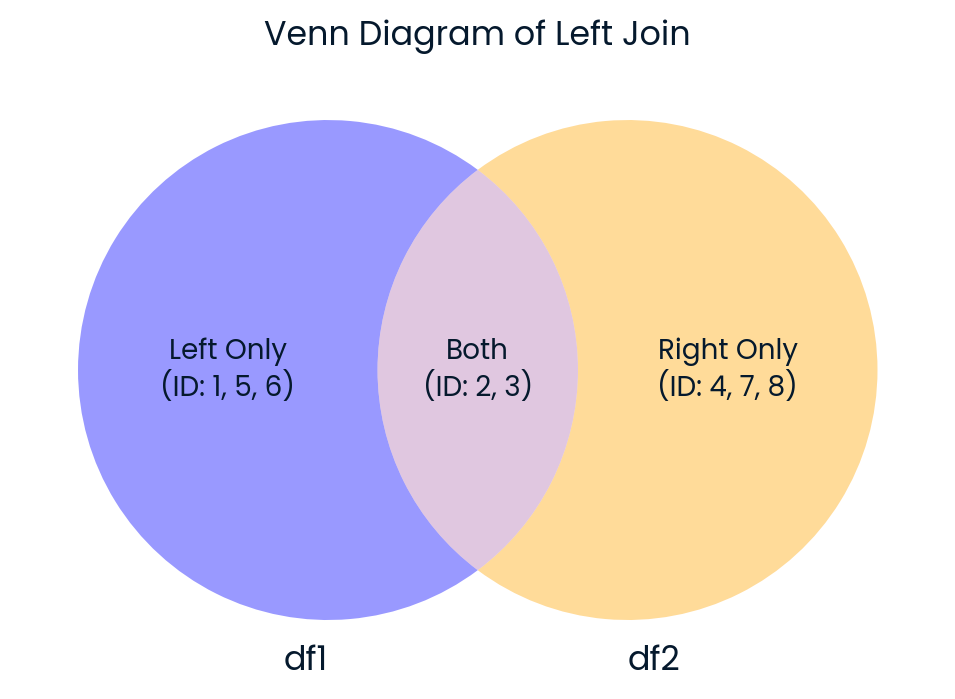

In [4]:
from matplotlib_venn import venn2

# Plotting a Venn diagram to explain the left join
plt.figure(figsize=(8, 4))
venn = venn2(subsets=(5, 5, 2), set_labels=('df1', 'df2'), set_colors=('blue', 'orange'))
venn.get_label_by_id('10').set_text('Left Only\n(ID: 1, 5, 6)')
venn.get_label_by_id('01').set_text('Right Only\n(ID: 4, 7, 8)')
venn.get_label_by_id('11').set_text('Both\n(ID: 2, 3)')
plt.title("Venn Diagram of Left Join")
plt.show()

## Right Join

In [5]:
# Creating sample dataframes
df1 = pd.DataFrame({
    'ID': [1, 2, 3, 5, 6],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve']
})

df2 = pd.DataFrame({
    'ID': [2, 3, 4, 7, 8],
    'Age': [25, 30, 35, 40, 45]
})

# Performing a right join
result = pd.merge(df1, df2, on='ID', how='right')

# Displaying the result
result

,ID,Name,Age
0,2,Bob,25
1,3,Charlie,30
2,4,NaN,35
3,7,NaN,40
4,8,NaN,45


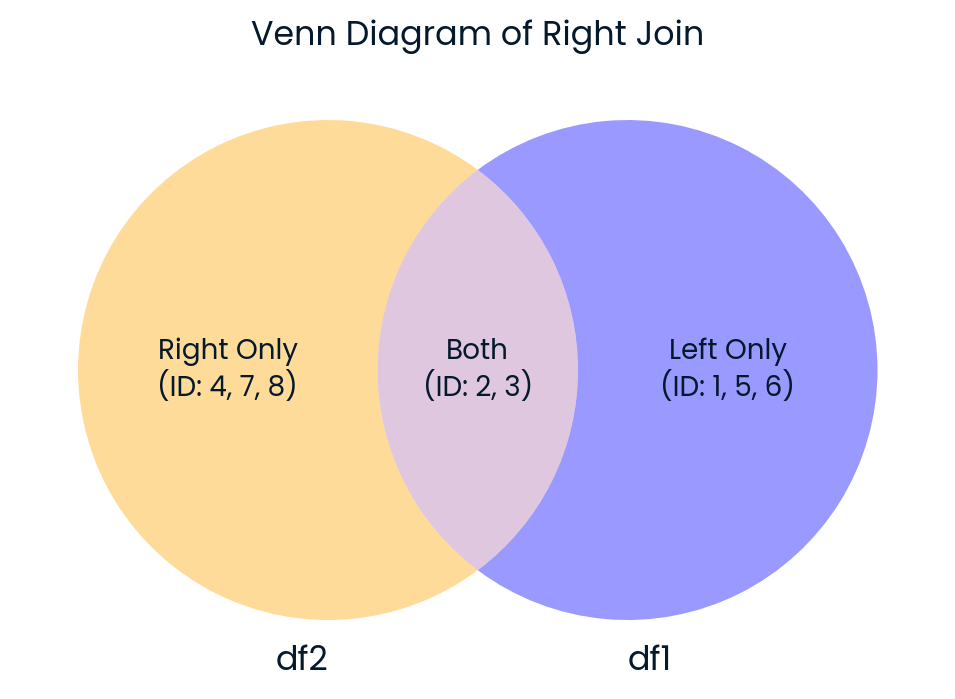

In [8]:
# Plotting a Venn diagram to explain the right join
plt.figure(figsize=(8, 4))
venn = venn2(subsets=(5, 5, 2), set_labels=('df2', 'df1'), set_colors=('orange', 'blue'))
venn.get_label_by_id('01').set_text('Left Only\n(ID: 1, 5, 6)')
venn.get_label_by_id('10').set_text('Right Only\n(ID: 4, 7, 8)')
venn.get_label_by_id('11').set_text('Both\n(ID: 2, 3)')
plt.title("Venn Diagram of Right Join")
plt.show()

## Inner join

In [9]:
# Creating sample dataframes
df1 = pd.DataFrame({
    'ID': [1, 2, 3, 5, 6],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve']
})

df2 = pd.DataFrame({
    'ID': [2, 3, 4, 7, 8],
    'Age': [25, 30, 35, 40, 45]
})

# Performing a inner join
result = pd.merge(df1, df2, on='ID', how='inner')

# Displaying the result
result

,ID,Name,Age
0,2,Bob,25
1,3,Charlie,30


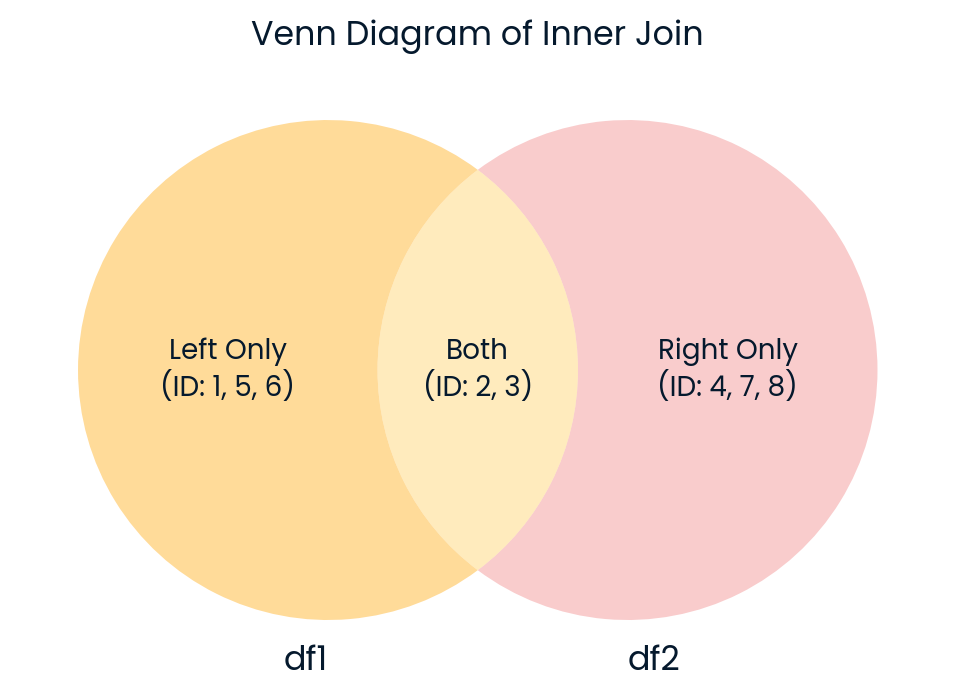

In [10]:
# Plotting a Venn diagram to explain the inner join
plt.figure(figsize=(8, 4))
venn = venn2(subsets=(5, 5, 2), set_labels=('df1', 'df2'), set_colors=('orange', 'lightcoral'))
venn.get_label_by_id('10').set_text('Left Only\n(ID: 1, 5, 6)')
venn.get_label_by_id('01').set_text('Right Only\n(ID: 4, 7, 8)')
venn.get_label_by_id('11').set_text('Both\n(ID: 2, 3)')
plt.title("Venn Diagram of Inner Join")
plt.show()

## Outer Join

In [11]:
# Creating smaller sample dataframes
df1 = pd.DataFrame({
    'ID': [1, 2, 3, 5, 6],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve']
})

df2 = pd.DataFrame({
    'ID': [2, 3, 4, 7, 8],
    'Age': [25, 30, 35, 40, 45]
})

# Performing a outer join
result = pd.merge(df1, df2, on='ID', how='outer')

# Displaying the result
result

,ID,Name,Age
0,1,Alice,NaN
1,2,Bob,25.0
2,3,Charlie,30.0
3,4,NaN,35.0
4,5,David,NaN
5,6,Eve,NaN
6,7,NaN,40.0
7,8,NaN,45.0


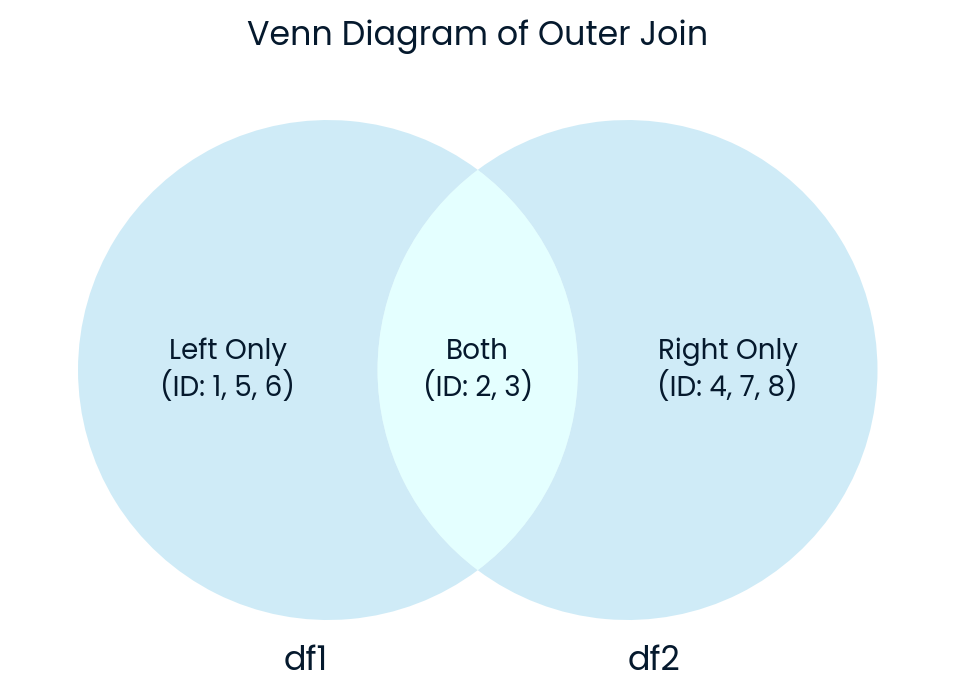

In [12]:
# Plotting a Venn diagram to explain the outer join
plt.figure(figsize=(8, 4))
venn = venn2(subsets=(5, 5, 2), set_labels=('df1', 'df2'), set_colors=('skyblue', 'skyblue'))
venn.get_label_by_id('10').set_text('Left Only\n(ID: 1, 5, 6)')
venn.get_label_by_id('01').set_text('Right Only\n(ID: 4, 7, 8)')
venn.get_label_by_id('11').set_text('Both\n(ID: 2, 3)')
plt.title("Venn Diagram of Outer Join")
plt.show()

## Cross Join

In [15]:
# Creating smaller sample dataframes
df1 = pd.DataFrame({
    'ID': [1, 2, 3, 5, 6],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve']
})

df2 = pd.DataFrame({
    'ID': [2, 3, 4, 7, 8, 9],
    'Age': [25, 30, 35, 40, 45, 42]
})

# Performing a outer join
result = pd.merge(df1, df2, how='cross')

# Displaying the result
result

,ID_x,Name,ID_y,Age
0,1,Alice,2,25
1,1,Alice,3,30
2,1,Alice,4,35
3,1,Alice,7,40
4,1,Alice,8,45
5,1,Alice,9,42
6,2,Bob,2,25
7,2,Bob,3,30
8,2,Bob,4,35
9,2,Bob,7,40


In [16]:
print("First dataframe shape : ", df1.shape[0])
print("Second dataframe shape : ", df2.shape[0])
print("Cross dataframe shape : ", result.shape[0])

First dataframe shape :  5
Second dataframe shape :  6
Cross dataframe shape :  30
